In [1]:
#-*- coding:utf-8 -*-
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**各種折扣對單次購物消費額的影響**

In [2]:
df = pd.read_csv('Ntu_Orders.csv', encoding='utf-8')
# 只選擇交易完畢的
df = df[(df['SalesOrderSlaveStatusDef'] == 'Finish')]

In [3]:
df['DateIdRaw'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')

In [4]:
#針對每次購物作整理
gp = df.groupby(by='TradesOrderGroupCode')

In [5]:
out = pd.DataFrame()
out['SalesOrderSlaveTotalPayment']=gp['SalesOrderSlaveTotalPayment'].sum()
out['PromotionDiscount']=-gp['PromotionDiscount'].sum()
out['EcouponDiscount']=-gp['EcouponDiscount'].sum()
#總折扣
out['Discount']=out['EcouponDiscount'] + out['PromotionDiscount'] #變成正的，方便比較
out['DiscountProp'] = out['Discount']/out['SalesOrderSlaveTotalPayment']
out.index = range(0, out.shape[0])
out

,SalesOrderSlaveTotalPayment,PromotionDiscount,EcouponDiscount,Discount,DiscountProp
0,837.0,-0.0,-0.0,-0.0,-0.000000
1,690.0,-0.0,-0.0,-0.0,-0.000000
2,921.0,140.0,102.0,242.0,0.262758
3,1583.0,100.0,-0.0,100.0,0.063171
4,697.0,352.0,100.0,452.0,0.648494
5,747.0,-0.0,-0.0,-0.0,-0.000000
6,629.0,-0.0,-0.0,-0.0,-0.000000
7,2042.0,390.0,-0.0,390.0,0.190989
8,549.0,-0.0,-0.0,-0.0,-0.000000
9,1537.0,150.0,-0.0,150.0,0.097593


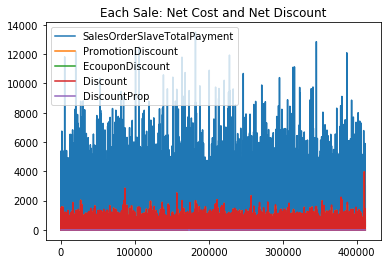

In [6]:
ax = out.plot(title='Each Sale: Net Cost and Net Discount')
plt.show()

In [7]:
maxV = out['DiscountProp'].max()
minV = out['DiscountProp'].min()
grpCnt = 15
intvV = (maxV - minV) / grpCnt
def group(x):
    if np.isnan(x):
        print('%r '%(x), end='')
        print(x)
        return 'group00'
    i = np.floor((x-minV)/intvV)
    return 'group' + '%02i'%(i)
out['DiscountGroup'] = out['DiscountProp'].apply(group)

nan nan


In [8]:
out2 = out.groupby(by='DiscountGroup')['DiscountProp'].count()
out2

DiscountGroup
group00    336549
group01     62489
group02      9599
group03      2076
group04       724
group05       227
group06        70
group07        45
group08        14
group09         3
group13         2
group15         1
Name: DiscountProp, dtype: int64

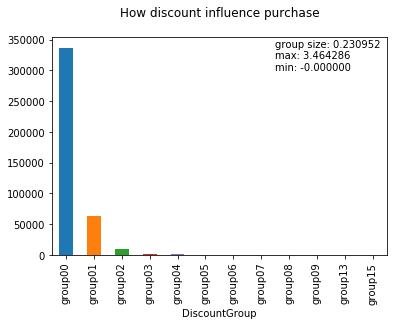

In [9]:
ax2 = out2.plot(kind='bar', title='How discount influence purchase\n')
ax2.text(7.5,300000,'group size: %f\nmax: %f\nmin: %f'%(intvV, maxV, minV))
plt.show()